In [13]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [5]:
df = pd.read_csv('text.csv')

In [7]:
df.head(5)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416809 entries, 0 to 416808
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  416809 non-null  int64 
 1   text        416809 non-null  object
 2   label       416809 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 9.5+ MB


In [12]:
data = df.drop("Unnamed: 0", axis='columns')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416809 entries, 0 to 416808
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    416809 non-null  object
 1   label   416809 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 6.4+ MB


In [15]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vedag\AppData\Roaming\nltk_data...


True

In [16]:
# Initialize NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.isalpha() and token not in stop_words]
    return ' '.join(tokens)
data['processed_text'] = data['text'].apply(preprocess_text)
print(data.head())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vedag\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vedag\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vedag\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                                text  label  \
0      i just feel really helpless and heavy hearted      4   
1  ive enjoyed being able to slouch about relax a...      0   
2  i gave up my internship with the dmrg and am f...      4   
3                         i dont know i feel so lost      0   
4  i am a kindergarten teacher and i am thoroughl...      4   

                                      processed_text  
0                 feel really helpless heavy hearted  
1  ive enjoyed able slouch relax unwind frankly n...  
2            gave internship dmrg feeling distraught  
3                                dont know feel lost  
4  kindergarten teacher thoroughly weary job take...  


In [17]:
data.head(2)

,text,label,processed_text
0,i just feel really helpless and heavy hearted,4,feel really helpless heavy hearted
1,ive enjoyed being able to slouch about relax a...,0,ive enjoyed able slouch relax unwind frankly n...


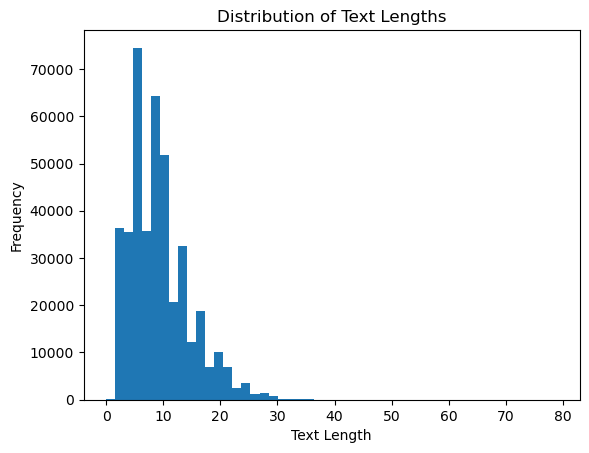

In [19]:
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

# Tokenize the text and calculate lengths
data['text_length'] = data['processed_text'].apply(lambda x: len(word_tokenize(x)))

# Plot the distribution of text lengths
plt.hist(data['text_length'], bins=50)
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths')
plt.show()

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from sklearn.model_selection import train_test_split

In [21]:
# labels to one-hot encoding (binary matrix format)
labels = pd.get_dummies(data['label']).values

X_train, X_test, y_train, y_test = train_test_split(data['processed_text'], labels, test_size=0.2)

In [22]:
# Tokenization and padding 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

X_train = pad_sequences(X_train, maxlen=40)
X_test = pad_sequences(X_test, maxlen=40)


In [23]:
# Building the model
model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=40),
    LSTM(64),
    Dense(6, activation='softmax')  # 6 emotions
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
10421/10421 [==============================] - 211s 20ms/step - loss: 0.1634 - accuracy: 0.9191 - val_loss: 0.0971 - val_accuracy: 0.9378
Epoch 2/5
10421/10421 [==============================] - 217s 21ms/step - loss: 0.0933 - accuracy: 0.9396 - val_loss: 0.0914 - val_accuracy: 0.9382
Epoch 3/5
10421/10421 [==============================] - 214s 21ms/step - loss: 0.0891 - accuracy: 0.9410 - val_loss: 0.0918 - val_accuracy: 0.9394
Epoch 4/5
10421/10421 [==============================] - 217s 21ms/step - loss: 0.0866 - accuracy: 0.9418 - val_loss: 0.0925 - val_accuracy: 0.9391
Epoch 5/5
10421/10421 [==============================] - 216s 21ms/step - loss: 0.0848 - accuracy: 0.9429 - val_loss: 0.0936 - val_accuracy: 0.9351


In [24]:
# Evaluate the model

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Generate a confusion matrix

from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_test_classes = y_test.argmax(axis=1)

print(confusion_matrix(y_test_classes, y_pred_classes))
print(classification_report(y_test_classes, y_pred_classes))

2606/2606 [==============================] - 17s 6ms/step - loss: 0.0936 - accuracy: 0.9351
Loss: 0.09364224970340729, Accuracy: 0.9351382851600647
2606/2606 [==============================] - 16s 6ms/step
[[23630    21     0    97   346     3]
 [   57 27119   927    51    13    24]
 [    3  1390  5665     0     1     0]
 [  580    26     0 10483   417     0]
 [  186    12     0   125  9017   194]
 [   21   261     0     0   652  2041]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     24097
           1       0.94      0.96      0.95     28191
           2       0.86      0.80      0.83      7059
           3       0.97      0.91      0.94     11506
           4       0.86      0.95      0.90      9534
           5       0.90      0.69      0.78      2975

    accuracy                           0.94     83362
   macro avg       0.92      0.88      0.90     83362
weighted avg       0.94      0.94      0.93     83362



In [25]:
# Saving the model

model.save('emotion_classification_model.h5')